In [43]:
## Ej 3
mme.expo = function(ma) {
    return(1 / mean(ma))
}

mme.expo.cor = function(ma) {
    n = length(ma)
    #return (((n-1)/n) * (n/sum(ma)))
    return (((n-1)/n) * (n/sum(ma)))
}

In [44]:
## Ej 4
lambdas = c(1, 5, 10)
ns = c(3, 5, 10, 20, 50, 100)
Nrep = 1000
sesgo_empirico = data.frame(matrix(ncol=length(ns), nrow=length(lambdas)))
sesgo_empirico.cor = data.frame(matrix(ncol=length(ns), nrow=length(lambdas)))
rownames(sesgo_empirico) = lambdas
rownames(sesgo_empirico.cor) = lambdas
colnames(sesgo_empirico) = ns
colnames(sesgo_empirico.cor) = ns 

for (l_idx in 1:length(lambdas)) {
    lambda = lambdas[l_idx]
    for (n_idx in 1:length(ns)) {
        n = ns[n_idx]
        sesgo_empirico[l_idx, n_idx] = mean(sapply(1:Nrep, function(rep_idx) { 
            mme.expo(rexp(n, lambda)) - lambda 
        }))
        sesgo_empirico.cor[l_idx, n_idx] = mean(sapply(1:Nrep, function(rep_idx) { 
            mme.expo.cor(rexp(n, lambda)) - lambda 
        }))
    }
}
print('MME.expo')
sesgo_empirico
print('MME.expo.cor')
sesgo_empirico.cor

[1] "MME.expo"


,3,5,10,20,50,100
1,0.486161,0.2846394,0.1154619,0.05100113,0.01891397,0.01322206
5,2.143312,1.1773245,0.6545285,0.28792308,0.09874456,0.06248758
10,5.126785,2.6234527,1.1157700,0.51268900,0.25156702,0.11251403


[1] "MME.expo.cor"


,3,5,10,20,50,100
1,-0.05242234,-0.02479777,0.01344171,-0.003708979,0.005826104,0.00492002
5,0.12549221,-0.03148879,-0.02291661,-0.041685301,0.024215088,0.03428644
10,0.12169366,-0.11123300,-0.09497513,-0.051541247,0.008710798,-0.03491573


In [47]:
## Flux
data = read.table("http://astrostatistics.psu.edu/datasets/GRB_afterglow.dat", header=T, skip=1)

In [48]:
head(data)

t,f,s
133,122.7,5.7
143,109.5,5.4
153,101.4,5.2
163,92.0,4.9
173,86.8,4.8
183,83.7,4.7


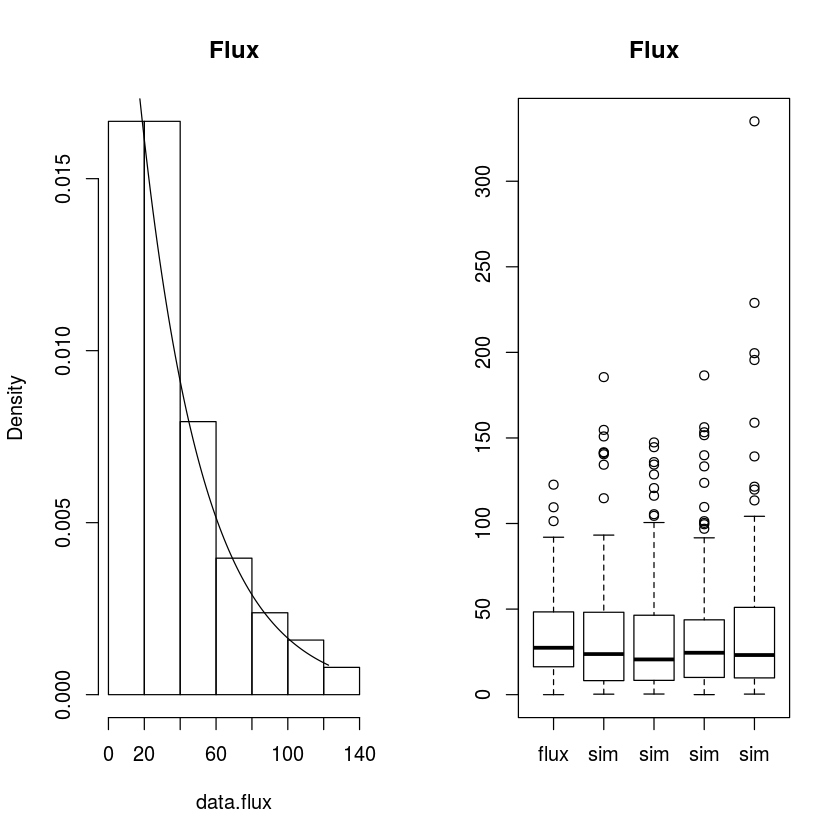

In [70]:
par(mfrow=c(1, 2))
data.flux = data[,2]
hist(data.flux, main='Flux', freq=F)
lambda.est = mme.expo.cor(data.flux)
xs = seq(min(data.flux), max(data.flux), length.out=100)
lines(xs, dexp(xs, lambda.est))

exp.sims = lapply(1:4, function(x) {rexp(200, lambda.est)})
boxplot(c(list(data.flux), exp.sims), main='Flux', names=c('flux', rep('sim', 4)))

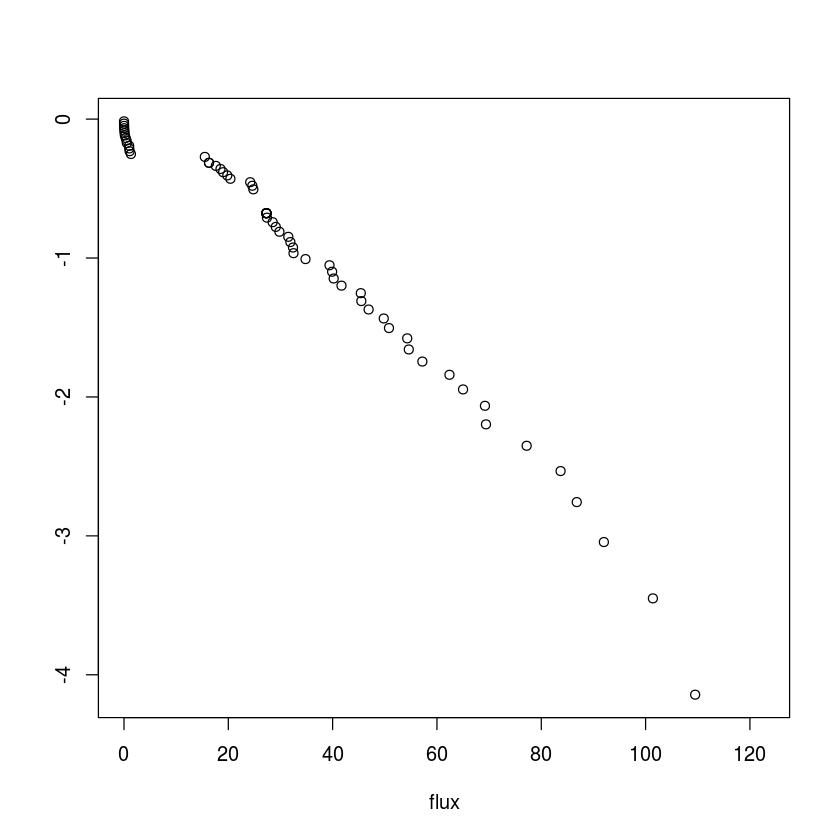

In [79]:
pflux.emp = ecdf(data.flux)
plot(data.flux, log(1 - pflux.emp(data.flux)), xlab='flux', ylab='')

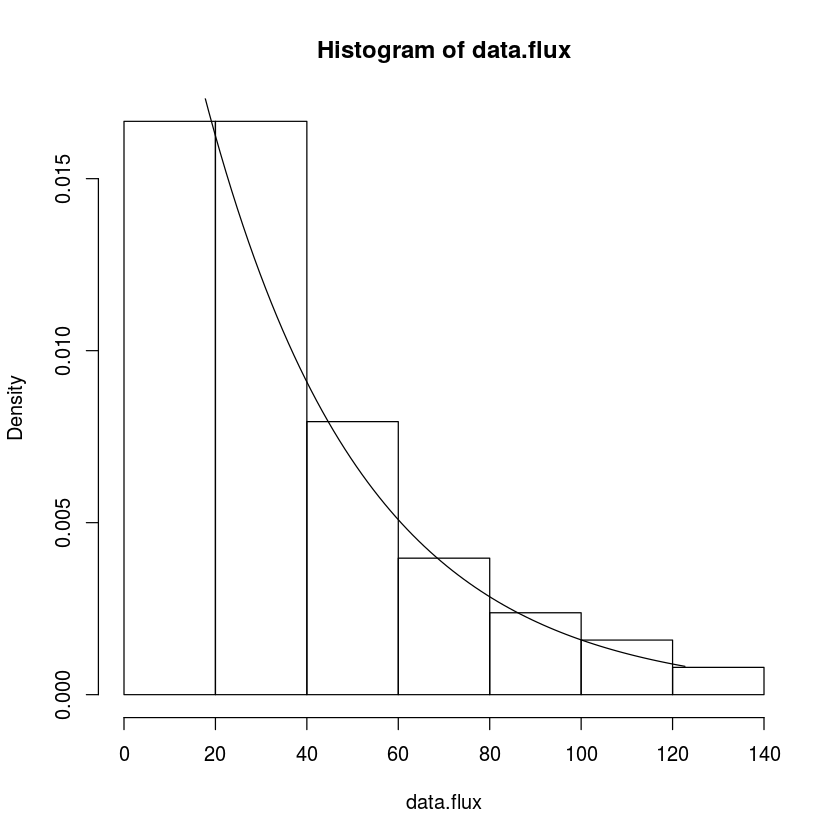

In [82]:
## Ej flux.4
flux.lambda = mme.expo(data.flux)
hist(data.flux, freq=F)
xs = seq(min(data.flux), max(data.flux), length.out=100)
lines(xs, dexp(xs, flux.lambda))

In [85]:
## Ej flux.7
mean.est = mean(data.flux)
nivel = 0.95
alpha = 1 - nivel
se.hat = 1 / (sqrt(length(data.flux)) * mme.expo(data.flux))
z = qnorm(alpha/2)
conf.int = c(mean.est + z * se.hat, mean.est - z * se.hat)
conf.int

[1] 25.93787 42.94802